In [2]:
import os
import pandas as pd

path = "."  #absolute or relative path to the folder containing the file. 
            #"." for current folder

#read and print values from the dataset to check if it imported correctly
filename_read = os.path.join(path, "pokemon.csv")
df = pd.read_csv(filename_read)
print(df[0:5])
df = df.sample(frac=1).reset_index(drop=True)
print(df[0:5])

   pokedex_number        Name  Type1   Type2  hp  height_m  weight_kg  attack  \
0               1   bulbasaur  Grass  Poison  45       0.7        6.9      49   
1               2     ivysaur  Grass  Poison  60       1.0       13.0      62   
2               3    venusaur  Grass  Poison  80       2.0      100.0     100   
3               4  charmander   Fire     NaN  39       0.6        8.5      52   
4               5  charmeleon   Fire     NaN  58       1.1       19.0      64   

   defense  speed  ...  against_ghost  against_grass  against_ground  \
0       49     45  ...            1.0           0.25             1.0   
1       63     60  ...            1.0           0.25             1.0   
2      123     80  ...            1.0           0.25             1.0   
3       43     65  ...            1.0           0.50             2.0   
4       58     80  ...            1.0           0.50             2.0   

  against_ice  against_normal  against_poison  against_psychic  against_rock  \


In [3]:
#taken from tutorial 3
#df = df.select_dtypes(include=['int', 'float'])

#encode target names to integers
#https://stackoverflow.com/questions/49037286/pandas-string-values-encoding
from sklearn.preprocessing import LabelEncoder
import numpy as np

print(df['Type1'][0:20])

le = LabelEncoder()
df['Type1'] = le.fit_transform(df['Type1'])

print(df['Type1'][0:20])

#collect the columns names for non-target features
result = []
for x in df.columns:
    if (x == 'attack') or (x == 'defense') or (x == 'speed') or (x == 'sp_defense') or (x == 'sp_attack') or (x == 'weight'):
        result.append(x)

#get data (often called X) and target (often calle y) and display its shape
X = df[result].values
yalt = df['Type1'].values
print(X.shape)
print(yalt.shape)

from tensorflow import keras

y = keras.utils.to_categorical(df['Type1'].to_numpy())

print(y.shape)

0      Psychic
1     Electric
2     Electric
3      Psychic
4        Fairy
5          Ice
6       Poison
7     Electric
8       Normal
9        Grass
10       Ghost
11      Normal
12    Fighting
13       Grass
14        Dark
15       Grass
16      Ground
17    Fighting
18    Electric
19      Ground
Name: Type1, dtype: object
0     14
1      3
2      3
3     14
4      4
5     11
6     13
7      3
8     12
9      9
10     8
11    12
12     5
13     9
14     1
15     9
16    10
17     5
18     3
19    10
Name: Type1, dtype: int32
(801, 5)
(801,)
(801, 18)


In [4]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, yalt, test_size=0.15, random_state=4)

# Create a Perceptron, with its training parameters
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)

# Train the model
ppn.fit(X_train,y_train)

# Make predication
y_pred = ppn.predict(X_test)

# Evaluate accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.04


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

kf = KFold(6)

for train, test in kf.split(X):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

    model.fit(X_train,y_train,verbose=0,epochs=128)
    pred = model.predict(X_test)
    pred = np.argmax(pred,axis=1)
    y_compare = np.argmax(y_test,axis=1) 
    score = metrics.accuracy_score(y_compare, pred)
    print("Accuracy score: {}".format(score))

Accuracy score: 0.23134328358208955
Accuracy score: 0.23134328358208955
Accuracy score: 0.26865671641791045
Accuracy score: 0.2857142857142857
Accuracy score: 0.2857142857142857
Accuracy score: 0.2556390977443609


In [37]:

pred = model.predict(X) # using all the data
#print(pred[0:10]) # print first ten predictions
print(pred.shape)
print(y.shape)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y,axis=1) 
print(pred[0:20])
print(y_compare[0:20])
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

(801, 18)
(801, 18)
[14 14  3 14 17 15 13  3 12  6 17 12  5  0 17  9  5 10  0 10]
[14  3  3 14  4 11 13  3 12  9  8 12  5  9  1  9 10  5  3 10]
Accuracy score: 0.4431960049937578


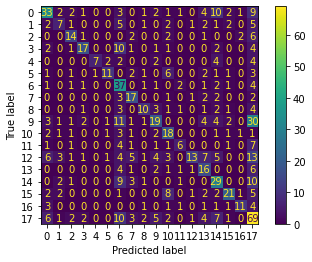

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(y,axis=1), np.argmax(pred,axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
print(df['Type1'].value_counts())
df2 = pd.read_csv(filename_read)
df2 = df2.sample(frac=1).reset_index(drop=True)
print(df2['Type1'].value_counts())

17    115
9      80
0      72
12     67
14     56
6      52
15     45
3      39
10     33
13     32
5      30
1      29
2      28
7      28
8      27
16     24
11     23
4      21
Name: Type1, dtype: int64
Water       115
Grass        80
Bug          72
Normal       67
Psychic      56
Fire         52
Rock         45
Electric     39
Ground       33
Poison       32
Fighting     30
Dark         29
Dragon       28
Flying       28
Ghost        27
Steel        24
Ice          23
Fairy        21
Name: Type1, dtype: int64
